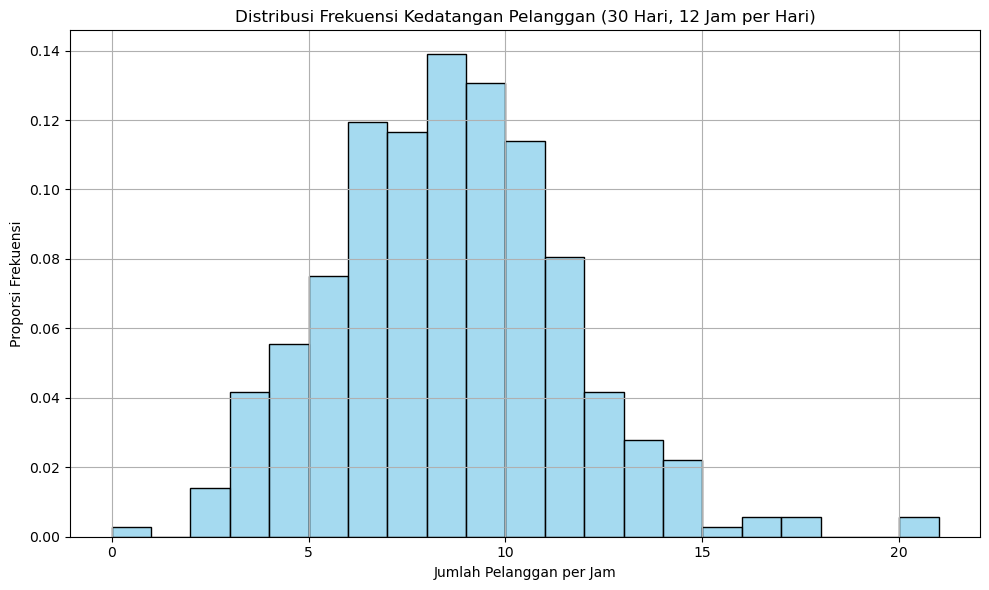

Probabilitas tidak ada pelanggan dalam satu jam: 0.00034
Probabilitas lebih dari 10 pelanggan dalam satu jam: 0.18411

Perbandingan Simulasi vs Distribusi Teoritis:
 Pelanggan |   Simulasi |   Teoritis
------------------------------------
         0 |     0.0028 |     0.0003
         2 |     0.0139 |     0.0107
         3 |     0.0417 |     0.0286
         4 |     0.0556 |     0.0573
         5 |     0.0750 |     0.0916
         6 |     0.1194 |     0.1221
         7 |     0.1167 |     0.1396
         8 |     0.1389 |     0.1396
         9 |     0.1306 |     0.1241
        10 |     0.1139 |     0.0993
        11 |     0.0806 |     0.0722
        12 |     0.0417 |     0.0481
        13 |     0.0278 |     0.0296
        14 |     0.0222 |     0.0169
        15 |     0.0028 |     0.0090
        16 |     0.0056 |     0.0045
        17 |     0.0056 |     0.0021
        20 |     0.0056 |     0.0002

File disimpan sebagai: perbandingan_simulasi_poisson.xlsx


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
import pandas as pd

# Parameter simulasi
lam = 8  # rata-rata pelanggan per jam
jam_per_hari = 12
jumlah_hari = 30
total_jam = jam_per_hari * jumlah_hari

# 1. Simulasi kedatangan pelanggan
simulasi_kedatangan = np.random.poisson(lam, total_jam)

# 2. Visualisasi histogram
plt.figure(figsize=(10, 6))
sns.histplot(simulasi_kedatangan,
             bins=range(0, max(simulasi_kedatangan) + 2),
             kde=False, stat="probability",
             color="skyblue", edgecolor="black")
plt.title("Distribusi Frekuensi Kedatangan Pelanggan (30 Hari, 12 Jam per Hari)")
plt.xlabel("Jumlah Pelanggan per Jam")
plt.ylabel("Proporsi Frekuensi")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Hitung probabilitas teoritis
p_0 = poisson.pmf(0, lam)
p_gt_10 = 1 - poisson.cdf(10, lam)

print(f"Probabilitas tidak ada pelanggan dalam satu jam: {p_0:.5f}")
print(f"Probabilitas lebih dari 10 pelanggan dalam satu jam: {p_gt_10:.5f}")

# 4. Perbandingan simulasi dan teoritis
nilai_unik, frekuensi_simulasi = np.unique(simulasi_kedatangan, return_counts=True)
proporsi_simulasi = frekuensi_simulasi / total_jam
distribusi_teoritis = poisson.pmf(nilai_unik, lam)

# Tampilkan tabel perbandingan
print("\nPerbandingan Simulasi vs Distribusi Teoritis:")
print(f"{'Pelanggan':>10} | {'Simulasi':>10} | {'Teoritis':>10}")
print("-" * 36)
for x, p_sim, p_teo in zip(nilai_unik, proporsi_simulasi, distribusi_teoritis):
    print(f"{x:10d} | {p_sim:10.4f} | {p_teo:10.4f}")

# 5. Simpan ke file Excel
df_perbandingan = pd.DataFrame({
    "Jumlah_Pelanggan": nilai_unik,
    "Proporsi_Simulasi": proporsi_simulasi,
    "Probabilitas_Teoritis": distribusi_teoritis
})

df_perbandingan.to_excel("perbandingan_simulasi_poisson.xlsx", index=False)
print("\nFile disimpan sebagai: perbandingan_simulasi_poisson.xlsx")

Probabilitas nasabah yang sudah menikah dan memiliki tanggungan keluarga lebih dari 1: 0.38
Probabilitas nasabah yang memiliki rumah di kawasan perkotaan dan penghasilan di atas rata-rata: 0.50


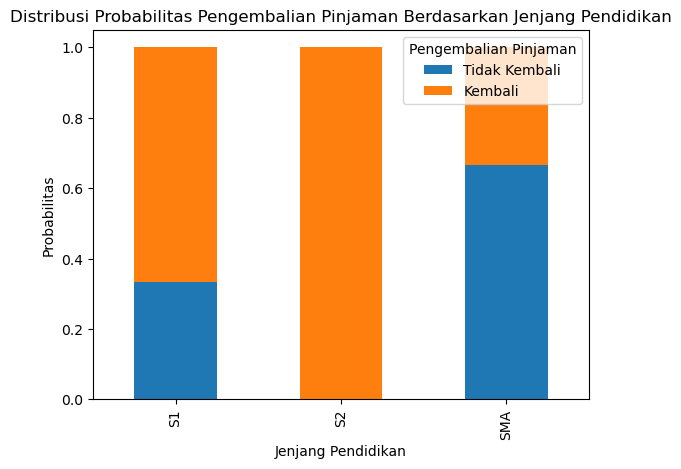

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh data pelanggan
data = {
    'status_menikah': ['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes'],
    'tanggungan_keluarga': [2, 0, 3, 1, 2, 4, 1, 0],
    'status_rumah': ['urban', 'rural', 'urban', 'urban', 'rural', 'urban', 'rural', 'urban'],
    'penghasilan': [5000, 3000, 7000, 4000, 2000, 8000, 2500, 6000],
    'pengembalian_pinjam': ['yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes'],
    'jenjang_pendidikan': ['S1', 'SMA', 'S2', 'S1', 'SMA', 'S2', 'SMA', 'S1']
}
# Membuat DataFrame
df = pd.DataFrame(data)

# a. Probabilitas bersyarat
total_nasabah = len(df)
nasabah_menikah_dan_tanggungan = len(df[(df['status_menikah'] == 'yes') & (df['tanggungan_keluarga'] > 1)])
probabilitas_a = nasabah_menikah_dan_tanggungan / total_nasabah

print(f"Probabilitas nasabah yang sudah menikah dan memiliki tanggungan keluarga lebih dari 1: {probabilitas_a:.2f}")

# b. Probabilitas bersyarat
rata_rata_penghasilan = df['penghasilan'].mean()
nasabah_urban_dan_di_atas_rata_rata = len(df[(df['status_rumah'] == 'urban') & (df['penghasilan'] > rata_rata_penghasilan)])
probabilitas_b = nasabah_urban_dan_di_atas_rata_rata / total_nasabah

print(f"Probabilitas nasabah yang memiliki rumah di kawasan perkotaan dan penghasilan di atas rata-rata: {probabilitas_b:.2f}")

# Menghitung distribusi probabilitas berdasarkan jenjang pendidikan
probabilitas_jenjang = df.groupby('jenjang_pendidikan')['pengembalian_pinjam'].value_counts(normalize=True).unstack().fillna(0)

# Visualisasi
probabilitas_jenjang.plot(kind='bar', stacked=True)
plt.title('Distribusi Probabilitas Pengembalian Pinjaman Berdasarkan Jenjang Pendidikan')
plt.xlabel('Jenjang Pendidikan')
plt.ylabel('Probabilitas')
plt.legend(title='Pengembalian Pinjaman', labels=['Tidak Kembali', 'Kembali'])
plt.show()